In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 

In [2]:
df = pd.read_csv('C:\\Users\\m.m.s\\Downloads\\adult\\adult.data' , 
                names =  ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: >

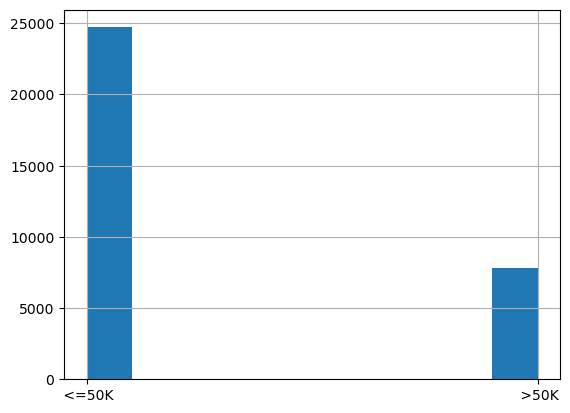

In [3]:
df['income'].hist()

In [4]:
x= df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# Define the columns to be one-hot encoded
categorical_columns = [1,3,5,6,7,8,9,13]

# Create the ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(), categorical_columns)] , remainder='passthrough')

In [7]:
# Apply the ColumnTransformer to the training and test datasets
x_train_encoded = ct.fit_transform(x_train)
x_test_encoded = ct.transform(x_test)

In [8]:
x=np.array(ct.fit_transform(x))
x

array(<32561x108 sparse matrix of type '<class 'numpy.float64'>'
	with 394963 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [9]:
y=LabelEncoder().fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

In [10]:
# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_encoded.toarray(), y_train)


GaussianNB()

In [11]:
# Make predictions on the test data
y_pred = nb_classifier.predict(x_test_encoded.toarray())

In [12]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
# Compute sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

In [18]:
# Calculate the posterior probability
if tp + fp > 0:
    posterior_prob = tp / (tp + fp)
else:
    posterior_prob = np.nan

In [19]:
# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Posterior Probability of making over 50K a year:", posterior_prob)

Sensitivity: 0.32017823042647997
Specificity: 0.9514366653176851
Posterior Probability of making over 50K a year: 0.676985195154778
